In [1]:
#Importing basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from numpy import mean
from numpy import std
from matplotlib import pyplot
from numpy import set_printoptions


In [2]:
#Importing the Dataset
#Data from old 2019 model training, includes data from 2014 to 2019
afl = pd.read_csv('C:\\Users\\D648007\\AFLdata2.csv')
dataset = afl

In [3]:
#Look at dataset's dimensions: rows and columns
print(dataset.shape)

(1862, 96)


In [3]:
#View first 15 rows to see what the data is like

#Outcome - home game win = 1
dataset.head(15)


,round,home_team,away_team,hm_score,aw_score,score_gap,hm_PWk_lad,aw_PWk_lad,PWk_lad_gap,hm_PWk_perc,...,h_win_2_gap,h_win_3_gap,h_win_4_gap,a_win_1_gap,a_win_2_gap,a_win_3_gap,a_win_4_gap,Interstate,PWk_hm,home_win
0,1,CA,RI,64,97,-33,18.0,1.0,-17.0,59.3,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0,0
1,1,CW,GE,65,72,-7,3.0,8.0,5.0,120.4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0
2,1,ME,PA,61,87,-26,5.0,10.0,5.0,131.4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0
3,1,AD,HW,55,87,-32,12.0,4.0,-8.0,104.1,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1,0
4,1,WB,SY,82,65,17,13.0,6.0,-7.0,77.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
5,1,BL,WC,102,58,44,15.0,2.0,-13.0,89.1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1
6,1,SK,GC,85,84,1,16.0,17.0,1.0,75.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1
7,1,GW,ES,112,40,72,7.0,11.0,4.0,114.3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1
8,1,FR,NM,141,59,82,14.0,9.0,-5.0,76.2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1
9,2,RI,CW,66,110,-44,5.0,11.0,6.0,151.6,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0


In [4]:
dataset.dtypes

round            int64
home_team       object
away_team       object
hm_score         int64
aw_score         int64
                ...   
a_win_3_gap    float64
a_win_4_gap    float64
Interstate     float64
PWk_hm           int64
home_win         int64
Length: 96, dtype: object

In [5]:
#Get basic descriptive stats of the dataset to understand mean, median, standard dev, range
dataset.describe()

,round,hm_score,aw_score,score_gap,hm_PWk_lad,aw_PWk_lad,PWk_lad_gap,hm_PWk_perc,aw_PWk_perc,PWk_perc_gap,...,h_win_2_gap,h_win_3_gap,h_win_4_gap,a_win_1_gap,a_win_2_gap,a_win_3_gap,a_win_4_gap,Interstate,PWk_hm,home_win
count,1862.000000,1862.000000,1862.000000,1862.000000,1861.000000,1841.000000,1841.000000,1861.000000,1841.000000,1841.000000,...,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1862.000000,1862.000000
mean,11.994092,86.382922,80.276047,6.106874,9.522300,9.273221,-0.255296,102.644868,104.182835,-1.574796,...,0.169022,0.112500,0.075000,0.276630,0.199457,0.134783,0.079348,0.714674,0.281418,0.529538
std,6.631910,34.039093,32.780695,44.298216,5.168366,5.212525,7.209143,29.573266,30.487561,40.552021,...,0.374873,0.316067,0.263463,0.447454,0.399700,0.341584,0.270354,0.451692,0.449812,0.499261
min,1.000000,0.000000,0.000000,-138.000000,0.000000,0.000000,-17.000000,0.000000,0.000000,-223.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,68.000000,62.000000,-22.000000,5.000000,5.000000,-5.000000,82.000000,83.200000,-27.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,87.000000,81.000000,3.000000,10.000000,9.000000,-1.000000,102.900000,104.200000,-1.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,18.000000,107.750000,100.000000,34.000000,14.000000,14.000000,5.000000,120.400000,121.900000,25.300000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,23.000000,233.000000,187.000000,186.000000,18.000000,18.000000,17.000000,270.300000,280.000000,174.600000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
#To understand class distribution - i.e. how many in the sample get a home win vs dont
#This is a 'classification' prediction exercise, we want to classify teams into two groups - will/won't win at home 
class_counts = dataset.groupby('home_win').size()
print(class_counts)

home_win
0    876
1    986
dtype: int64


In [7]:
#Identify which columns have NaN (Not a Number - i.e. missing values)
nan_values = dataset.isna()
nan_columns = nan_values.any()

columns_with_nan = dataset.columns[nan_columns].tolist()
print(columns_with_nan)

#Need to remove the NaN

['hm_PWk_lad', 'aw_PWk_lad', 'PWk_lad_gap', 'hm_PWk_perc', 'aw_PWk_perc', 'PWk_perc_gap', 'hm_PWk_pts', 'aw_PWk_pts', 'PWk_pts_gap', 'hm_PWk_pts_stan', 'aw_PWk_pts_stan', 'PWk_pts_gap_stan', 'aw_PY', 'aw_PY_perc', 'aw_2PY', 'aw_2PY_perc', 'aw_3PY', 'aw_3PY_perc', 'aw_4PY', 'aw_4PY_perc', 'aw_PY_2PY', 'aw_PY_3PY', 'aw_PY_4PY', 'aw_Pypc_2Pypc', 'aw_Pypc_3Pypc', 'aw_Pypc_4Pypc', 'PY_gap', 'PY_%_gap', '2PY_gap', '2PY_%_gap', '3PY_gap', '3PY_%_gap', '4PY_gap', '4PY_%_gap', 'aw_Dr_PY', 'aw_Dr_2PY', 'aw_Dr_3py', 'aw_Dr_4py', 'aw_Dr_Tot', 'Dr_PY_gap', 'Dr_2PY_gap', 'Dr_3PY_gap', 'Dr_4PY_gap', 'Dr_Tot_gap', 'aw_Pwk_win', 'aw_2Pwk_win', 'aw_3Pwk_win', 'aw_4Pwk_win', 'aw_win_1', 'aw_win_2', 'aw_win_3', 'aw_win_4', 'h_win_1_gap', 'h_win_2_gap', 'h_win_3_gap', 'h_win_4_gap', 'a_win_1_gap', 'a_win_2_gap', 'a_win_3_gap', 'a_win_4_gap', 'Interstate']


In [8]:
# Get names of indexes for which column hm_score has value 0
indexNames = dataset[ dataset['hm_score'] == 0 ].index

In [9]:
# Delete these row indexes from dataFrame
dataset.drop(indexNames , inplace=True)

In [10]:
#Look at dataset's dimensions: rows and columns
print(dataset.shape)

(1762, 96)


In [11]:
#Check whether all NaNs have been removed
#Identify which columns have NaN (Not a Number - i.e. missing values)
nan_values = dataset.isna()
nan_columns = nan_values.any()

columns_with_nan = dataset.columns[nan_columns].tolist()
print(columns_with_nan)


[]


In [12]:
#To understand class distribution - i.e. how many in the sample are a home win vs loss

class_counts = dataset.groupby('home_win').size()
print(class_counts)

home_win
0    776
1    986
dtype: int64


In [13]:
#Remove columns that won't be used for training
dataset.drop(['home_team', 'away_team', 'hm_score', 'aw_score', 'score_gap'], axis=1, inplace=True )

In [14]:
dataset.head(2)

,round,hm_PWk_lad,aw_PWk_lad,PWk_lad_gap,hm_PWk_perc,aw_PWk_perc,PWk_perc_gap,hm_PWk_pts,aw_PWk_pts,PWk_pts_gap,...,h_win_2_gap,h_win_3_gap,h_win_4_gap,a_win_1_gap,a_win_2_gap,a_win_3_gap,a_win_4_gap,Interstate,PWk_hm,home_win
0,1,18.0,1.0,-17.0,59.3,136.1,-76.8,8.0,72.0,64.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0,0
1,1,3.0,8.0,5.0,120.4,131.6,-11.2,60.0,52.0,-8.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0


In [15]:
#Reduce dataset down to the features identified through RFE feature selection using RF model
dataset = dataset[['hm_PWk_lad', 'PWk_lad_gap', 'hm_PWk_perc', 'aw_PWk_perc', 'PWk_perc_gap', 'PWk_pts_gap', 'hm_PWk_pts_stan',
                   'aw_PWk_pts_stan', 'PWk_pts_gap_stan', 'hm_PY', 'hm_PY_perc', 'hm_Pypc_2Pypc', 'aw_PY_perc', 'aw_2PY_perc',
                   'PY_gap', 'PY_%_gap', '2PY_%_gap', '3PY_%_gap', '4PY_%_gap', 'aw_Dr_PY', "home_win"]]

In [16]:
dataset.head(2)

,hm_PWk_lad,PWk_lad_gap,hm_PWk_perc,aw_PWk_perc,PWk_perc_gap,PWk_pts_gap,hm_PWk_pts_stan,aw_PWk_pts_stan,PWk_pts_gap_stan,hm_PY,...,hm_Pypc_2Pypc,aw_PY_perc,aw_2PY_perc,PY_gap,PY_%_gap,2PY_%_gap,3PY_%_gap,4PY_%_gap,aw_Dr_PY,home_win
0,18.0,-17.0,59.3,136.1,-76.8,64.0,0.347826,3.130435,2.782609,18,...,-18.9,136.1,118.3,17.0,-76.8,-40.1,-0.2,-58.3,217.0,0
1,3.0,5.0,120.4,131.6,-11.2,-8.0,2.608696,2.260870,-0.347826,3,...,21.4,131.6,117.4,-5.0,-11.2,-18.4,-48.2,5.2,280.0,0


In [17]:
#Print list of column names in training set

for col in dataset.columns:
    print(col)

hm_PWk_lad
PWk_lad_gap
hm_PWk_perc
aw_PWk_perc
PWk_perc_gap
PWk_pts_gap
hm_PWk_pts_stan
aw_PWk_pts_stan
PWk_pts_gap_stan
hm_PY
hm_PY_perc
hm_Pypc_2Pypc
aw_PY_perc
aw_2PY_perc
PY_gap
PY_%_gap
2PY_%_gap
3PY_%_gap
4PY_%_gap
aw_Dr_PY
home_win


In [18]:
#Find column index number for outcome value home_win
dataset.columns.get_loc("home_win")

20

In [19]:
#Before splitting into an array for model fitting, save the feature names for later use
feature_names = list(dataset.columns)
#remove the label name 'home_win'
del feature_names[20]

In [20]:
print(feature_names)

['hm_PWk_lad', 'PWk_lad_gap', 'hm_PWk_perc', 'aw_PWk_perc', 'PWk_perc_gap', 'PWk_pts_gap', 'hm_PWk_pts_stan', 'aw_PWk_pts_stan', 'PWk_pts_gap_stan', 'hm_PY', 'hm_PY_perc', 'hm_Pypc_2Pypc', 'aw_PY_perc', 'aw_2PY_perc', 'PY_gap', 'PY_%_gap', '2PY_%_gap', '3PY_%_gap', '4PY_%_gap', 'aw_Dr_PY']


In [21]:
#Create models using important features
#Separate the dataset into dependent (x) and independent (y, starting with converting to array
array = dataset.values

X = array[:, :20]
Y = array[:, 20]


In [22]:
Y = [1 if x == 1 else 0 for x in Y]

In [23]:
print(X.shape)

(1762, 20)


In [24]:
#check datatype of the array
print(X.dtype)

float64


In [25]:
#Rescale data, creates rescaledX

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rescaledX=scaler.fit_transform(X)

#summarise transformed data
set_printoptions(precision=3)
print(rescaledX[0:5, :])

[[ 1.634 -2.322 -1.515  1.052 -1.845  4.059 -1.536  1.143  1.93   1.659
  -1.666 -0.933  1.282  0.617  2.36  -2.106 -1.071 -0.009 -1.514 -0.403]
 [-1.285  0.733  0.604  0.9   -0.229 -0.541  0.721  0.294 -0.299 -1.25
   0.679  0.984  1.11   0.583 -0.692 -0.308 -0.491 -1.235  0.132  0.105]
 [-0.896  0.733  0.985  0.091  0.633 -0.541  0.548  0.125 -0.299 -0.862
   1.102  1.212  0.189  1.048 -0.692  0.651 -0.654 -0.218 -0.775  0.395]
 [ 0.466 -1.072  0.038  0.512 -0.347  0.737  0.2    0.634  0.32   0.495
   0.054 -1.552  0.669 -0.428  1.112 -0.44   1.21   0.5   -1.11  -1.468]
 [ 0.661 -0.933 -0.891  0.155 -0.746  1.503 -0.494  0.464  0.691  0.689
  -0.975 -0.976  0.262  0.938  0.973 -0.884 -0.793 -0.918 -0.314  0.024]]


In [26]:
# Train Random Forest model using Repeated Cross Validation on accuracy
from sklearn.ensemble import RandomForestClassifier

rcv = RepeatedKFold(n_splits=10, n_repeats=3, random_state = 5)
model = RandomForestClassifier(n_estimators=1000, max_features='log2', max_depth= 5)
results = cross_val_score(model, rescaledX, Y, cv=rcv, n_jobs=-1, scoring='accuracy')
print('Accuracy: %.3f (%.3f)' % (mean(results), std(results)))

Accuracy: 0.690 (0.027)


In [27]:
# Train Random Forest model using Repeated Cross Validation on log loss
from sklearn.ensemble import RandomForestClassifier

rcv = RepeatedKFold(n_splits=10, n_repeats=3, random_state = 5)
model = RandomForestClassifier(n_estimators=1000, max_features='log2', max_depth= 5)
results = cross_val_score(model, rescaledX, Y, cv=rcv, n_jobs=-1, scoring='neg_log_loss')
print('Logloss: %.3f (%.3f)' % (mean(results), std(results)))

Logloss: -0.572 (0.026)


In [28]:
# Train Random Forest model using Repeated Cross Validation on F1 score
from sklearn.ensemble import RandomForestClassifier

rcv = RepeatedKFold(n_splits=10, n_repeats=3, random_state = 5)
model = RandomForestClassifier()
results = cross_val_score(model, rescaledX, Y, cv=rcv, n_jobs=-1, scoring='f1')
print('f1: %.3f (%.3f)' % (mean(results), std(results)))

f1: 0.724 (0.029)


LR: -0.577405 (0.024108)
LDA: -0.579329 (0.026743)
KNN: -1.965180 (0.477706)
CART: -0.614933 (0.086309)
NB: -1.593937 (0.186434)
SVM: -0.598109 (0.026031)
RF: -0.571933 (0.026441)
XGB: -0.758231 (0.063927)
GBM: -0.668523 (0.054725)


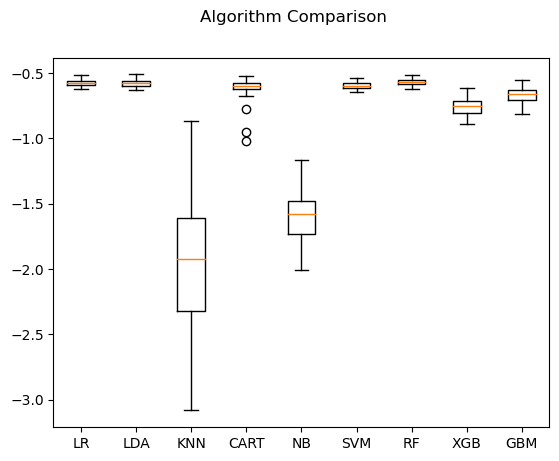

In [29]:
#Compare models using repeated K Fold Cross Val, solving for F1 score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

#prepare models
models = []
models.append(('LR', LogisticRegression(solver = 'lbfgs', C=0.01, penalty='l2')))
models.append(('LDA', LinearDiscriminantAnalysis(shrinkage= 0, solver='lsqr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(criterion = "entropy", max_depth=3)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(kernel = 'rbf', probability = True)))
models.append(('RF', RandomForestClassifier(n_estimators=1000, max_features='log2', max_depth= 5)))
models.append(('XGB', XGBClassifier()))
models.append(('GBM', GradientBoostingClassifier(n_estimators=500)))

#Evaluate each model in turn
results = []
names = []
for name, model in models:
    rcv = RepeatedKFold(n_splits=10, n_repeats=5, random_state = 5)
    rcv_results = cross_val_score(model, rescaledX, Y, cv=rcv, n_jobs=-1, scoring='f1')
    results.append(rcv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, rcv_results.mean(), rcv_results.std())
    print(msg)
    
#boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


LR: 0.731674 (0.027447)
LDA: 0.730963 (0.027751)
KNN: 0.698018 (0.036860)
CART: 0.704922 (0.030994)
NB: 0.707811 (0.028846)
SVM: 0.724737 (0.029823)
RF: 0.732096 (0.028102)
XGB: 0.709481 (0.032378)
GBM: 0.709288 (0.034446)


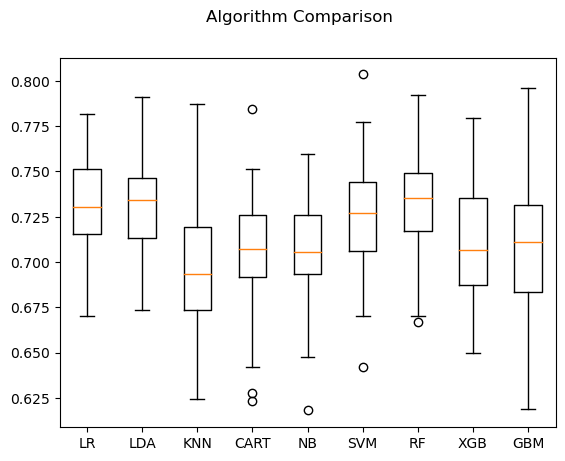

In [30]:
#Compare models using repeated K Fold Cross Val, solving for negative log loss
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

#prepare models
models = []
models.append(('LR', LogisticRegression(solver = 'lbfgs', C=0.01, penalty='l2')))
models.append(('LDA', LinearDiscriminantAnalysis(shrinkage= 0, solver='lsqr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(criterion = "entropy", max_depth=3)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(kernel = 'rbf', probability = True)))
models.append(('RF', RandomForestClassifier(n_estimators=1000, max_features='log2', max_depth= 5)))
models.append(('XGB', XGBClassifier()))
models.append(('GBM', GradientBoostingClassifier(n_estimators=500)))

#Evaluate each model in turn
results = []
names = []
for name, model in models:
    rcv = RepeatedKFold(n_splits=10, n_repeats=5, random_state = 5)
    rcv_results = cross_val_score(model, rescaledX, Y, cv=rcv, n_jobs=-1, scoring='f1')
    results.append(rcv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, rcv_results.mean(), rcv_results.std())
    print(msg)
    
#boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

LR: 0.691362 (0.027681)
LDA: 0.691482 (0.028181)
KNN: 0.661297 (0.037252)
CART: 0.679920 (0.029301)
NB: 0.687725 (0.029215)
SVM: 0.682289 (0.031631)
RF: 0.688978 (0.029857)
XGB: 0.671616 (0.030959)
GBM: 0.670256 (0.034347)


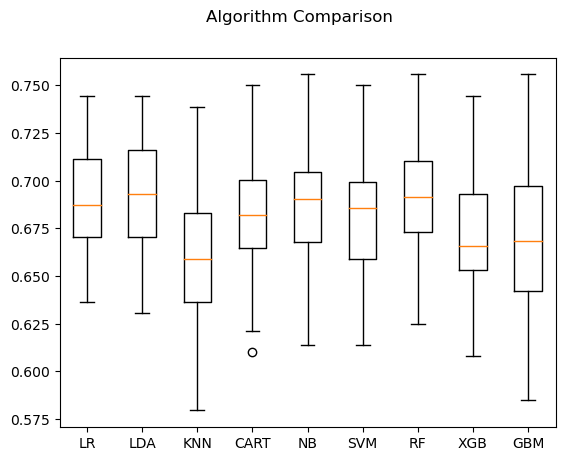

In [31]:
#Compare models using repeated K Fold Cross Val, solving for accuracy
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

#prepare models
models = []
models.append(('LR', LogisticRegression(solver = 'lbfgs', C=0.01, penalty='l2')))
models.append(('LDA', LinearDiscriminantAnalysis(shrinkage= 0, solver='lsqr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(criterion = "entropy", max_depth=3)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(kernel = 'rbf', probability = True)))
models.append(('RF', RandomForestClassifier(n_estimators=1000, max_features='log2', max_depth= 5)))
models.append(('XGB', XGBClassifier()))
models.append(('GBM', GradientBoostingClassifier(n_estimators=500)))

#Evaluate each model in turn
results = []
names = []
for name, model in models:
    rcv = RepeatedKFold(n_splits=10, n_repeats=5, random_state = 5)
    rcv_results = cross_val_score(model, rescaledX, Y, cv=rcv, n_jobs=-1, scoring='accuracy')
    results.append(rcv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, rcv_results.mean(), rcv_results.std())
    print(msg)
    
#boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
#9 algorithms tested with repeated Kfold and measured on Accuracy, logloss and F1 scores
#best performing algorithms are consistently
#Logistic Regression
#Linear Discriminant Analysis
#Random Forest
#Next step is to fine tune each model using grid search

In [32]:
#Fine tune Logistic Regression
#Logistic regression does not really have any critical hyperparameters to tune.

#Sometimes, you can see useful differences in performance or convergence with different solvers (solver).

#solver in [‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’]
#Regularization (penalty) can sometimes be helpful.

#penalty in [‘none’, ‘l1’, ‘l2’, ‘elasticnet’]
#Note: not all solvers support all regularization terms.

#The C parameter controls the penality strength, which can also be effective.

#C in [100, 10, 1.0, 0.1, 0.01]
#For the full list of hyperparameters, see:

#sklearn.linear_model.LogisticRegression API.
#removed solver = 'newton-cg', 
#removed l1 penalty and 'elasticnet'
#Best: 0.702414 using {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
# define models and parameters
model = LogisticRegression()
solvers = ['lbfgs', 'saga', 'newton-cg']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='neg_log_loss',error_score=0)
grid_result = grid_search.fit(rescaledX, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.576825 using {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
-0.579100 (0.035498) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
-0.579575 (0.035633) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
-0.579098 (0.035497) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
-0.579506 (0.035600) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
-0.579554 (0.035616) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
-0.579507 (0.035602) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
-0.579359 (0.035465) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
-0.579361 (0.035465) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
-0.579361 (0.035465) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
-0.578330 (0.034501) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
-0.578329 (0.034501) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
-0.578329 (0.034501) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
-0.576825 (0.030898) with: {'C': 0

In [ ]:
#Fine tune Linear Discriminant Analysis

#https://machinelearningmastery.com/linear-discriminant-analysis-with-python/

    
# define model
model = LinearDiscriminantAnalysis()
# define model evaluation method
solvers = ['lsqr']
shrinkage = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
# define grid search
grid = dict(solver=solvers, shrinkage=shrinkage)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)
grid_result = grid_search.fit(rescaledX, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [33]:
#Fine tune Random Forest

#The most important parameter is the number of random features to sample at each split point (max_features).

#You could try a range of integer values, such as 1 to 20, or 1 to half the number of input features.

#max_features [1 to 20]
#Alternately, you could try a suite of different default value calculators.

#max_features in [‘sqrt’, ‘log2’]
#Another important parameter for random forest is the number of trees (n_estimators).

#Ideally, this should be increased until no further improvement is seen in the model.

#Good values might be a log scale from 10 to 1,000.

#n_estimators in [10, 100, 1000]
#For the full list of hyperparameters, see:

#sklearn.ensemble.RandomForestClassifier API.

# define models and parameters
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RandomForestClassifier()
n_estimators = [1, 10, 100, 1000]
max_features = ['sqrt', 'log2']
max_depth = [2, 3, 4, 5, 7]
# define grid search
grid = dict(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='neg_log_loss',error_score=0)
grid_result = grid_search.fit(rescaledX, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.570720 using {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 1000}
-0.618732 (0.030405) with: {'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 1}
-0.586861 (0.020650) with: {'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 10}
-0.586587 (0.020321) with: {'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 100}
-0.586067 (0.020389) with: {'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 1000}
-0.623406 (0.033596) with: {'max_depth': 2, 'max_features': 'log2', 'n_estimators': 1}
-0.588324 (0.021564) with: {'max_depth': 2, 'max_features': 'log2', 'n_estimators': 10}
-0.586280 (0.020365) with: {'max_depth': 2, 'max_features': 'log2', 'n_estimators': 100}
-0.586095 (0.020477) with: {'max_depth': 2, 'max_features': 'log2', 'n_estimators': 1000}
-0.642194 (0.073693) with: {'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 1}
-0.581537 (0.026547) with: {'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 10}
-0.577226 (0.025013) with: {'max

In [ ]:
#Scott's code for measuring model accuracy based on the monash log based score

def new_scorer(y,y_pred):
    xx = pd.DataFrame({'y': list(y), 'y_pred': list(y_pred)}, columns=['y', 'y_pred'])
    xx.loc[xx['y'].astype(int)==0,'actual_score'] = 1+np.log2(1-xx['y_pred'].astype(float))
    xx.loc[xx['y'].astype(int)==1,'actual_score'] = 1+np.log2(xx['y_pred'].astype(float))
    return np.mean(xx['actual_score'])